# Yahoo Finance and Stock Beta

- This is the "public" but "not publicized" API from Yahoo.
   - Use for study and research purpose only.
   - That also means the API is not stable. It may change at any time.
- One can get this API by analysing network trace.
   - It involves some reverse engineering and guess work.
   - Many people online have done related analysis, e.g. [node-yahoo-finance#43](https://github.com/pilwon/node-yahoo-finance/issues/43)


In [1]:
import datetime
print('Last update:', datetime.datetime.now())

Last update: 2018-09-30 20:09:52.824952


In [2]:
%matplotlib inline

import pandas
import seaborn as sns
import requests
import json

## One raw query and navigate on the returned structure

In [3]:
r = requests.get('https://query1.finance.yahoo.com/v10/finance/quoteSummary/AAPL?formatted=true&lang=en-US&region=US&modules=summaryProfile%2CfinancialData%2CrecommendationTrend%2CupgradeDowngradeHistory%2Cearnings%2CdefaultKeyStatistics%2CcalendarEvents&corsDomain=finance.yahoo.com')

In [4]:
len(r.text)

21822

Returned value is a very big JSON string.

In [5]:
j = r.json()

In [6]:
# Try this yourself. Notebook spit out a lot output.
# j

In [7]:
type(j)

dict

In [8]:
j.keys()

dict_keys(['quoteSummary'])

In [9]:
j['quoteSummary'].keys()

dict_keys(['result', 'error'])

In [10]:
j['quoteSummary']['error']

In [11]:
type(j['quoteSummary']['result'])

list

In [12]:
len(j['quoteSummary']['result'])

1

In [13]:
type(j['quoteSummary']['result'][0])

dict

In [14]:
j['quoteSummary']['result'][0].keys()

dict_keys(['recommendationTrend', 'earnings', 'calendarEvents', 'upgradeDowngradeHistory', 'defaultKeyStatistics', 'summaryProfile', 'financialData'])

In [15]:
j['quoteSummary']['result'][0]['financialData']

{'currentPrice': {'fmt': '225.74', 'raw': 225.74},
 'currentRatio': {'fmt': '1.31', 'raw': 1.307},
 'debtToEquity': {'fmt': '99.70', 'raw': 99.696},
 'earningsGrowth': {'fmt': '40.10%', 'raw': 0.401},
 'ebitda': {'fmt': '78.53B', 'longFmt': '78,533,001,216', 'raw': 78533001216},
 'ebitdaMargins': {'fmt': '30.76%', 'raw': 0.30764},
 'financialCurrency': 'USD',
 'freeCashflow': {'fmt': '41.44B',
  'longFmt': '41,444,749,312',
  'raw': 41444749312},
 'grossMargins': {'fmt': '38.27%', 'raw': 0.38267},
 'grossProfits': {'fmt': '88.19B',
  'longFmt': '88,186,000,000',
  'raw': 88186000000},
 'maxAge': 86400,
 'numberOfAnalystOpinions': {'fmt': '36', 'longFmt': '36', 'raw': 36},
 'operatingCashflow': {'fmt': '73.03B',
  'longFmt': '73,032,998,912',
  'raw': 73032998912},
 'operatingMargins': {'fmt': '26.60%', 'raw': 0.26599002},
 'profitMargins': {'fmt': '21.98%', 'raw': 0.21983999},
 'quickRatio': {'fmt': '1.10', 'raw': 1.099},
 'recommendationKey': 'buy',
 'recommendationMean': {'fmt': '2.0

In [16]:
j['quoteSummary']['result'][0]['defaultKeyStatistics']

{'52WeekChange': {'fmt': '46.25%', 'raw': 0.4625187},
 'SandP52WeekChange': {'fmt': '15.22%', 'raw': 0.15217936},
 'annualHoldingsTurnover': {},
 'annualReportExpenseRatio': {},
 'beta': {'fmt': '1.26', 'raw': 1.256531},
 'beta3Year': {},
 'bookValue': {'fmt': '23.74', 'raw': 23.735},
 'category': None,
 'dateShortInterest': {'fmt': '2018-09-14', 'raw': 1536883200},
 'earningsQuarterlyGrowth': {'fmt': '32.10%', 'raw': 0.321},
 'enterpriseToEbitda': {'fmt': '14.11', 'raw': 14.112},
 'enterpriseToRevenue': {'fmt': '4.34', 'raw': 4.341},
 'enterpriseValue': {'fmt': '1.11T',
  'longFmt': '1,108,242,333,696',
  'raw': 1108242333696},
 'fiveYearAverageReturn': {},
 'floatShares': {'fmt': '4.57B',
  'longFmt': '4,574,761,009',
  'raw': 4574761009},
 'forwardEps': {'fmt': '13.71', 'raw': 13.71},
 'forwardPE': {'fmt': '16.47', 'raw': 16.465355},
 'fundFamily': None,
 'fundInceptionDate': {},
 'heldPercentInsiders': {'fmt': '0.07%', 'raw': 0.00068000006},
 'heldPercentInstitutions': {'fmt': '61.

In [17]:
j['quoteSummary']['result'][0]['defaultKeyStatistics']['beta']

{'fmt': '1.26', 'raw': 1.256531}

In [18]:
j['quoteSummary']['result'][0]['defaultKeyStatistics']['priceToBook']

{'fmt': '9.51', 'raw': 9.510849}

In [19]:
j['quoteSummary']['result'][0]['defaultKeyStatistics']['forwardEps']

{'fmt': '13.71', 'raw': 13.71}

### QUIZ

Can you calculate P/E (price to earning) based on information in the `j` variable?

## Study the beta values of several interested stocks

In [20]:
def get_beta(symbol):
    r = requests.get('https://query1.finance.yahoo.com/v10/finance/quoteSummary/{symbol}?formatted=true&lang=en-US&region=US&modules=summaryProfile%2CfinancialData%2CrecommendationTrend%2CupgradeDowngradeHistory%2Cearnings%2CdefaultKeyStatistics%2CcalendarEvents&corsDomain=finance.yahoo.com'.format(symbol=symbol))
    return json.loads(r.text)['quoteSummary']['result'][0]['defaultKeyStatistics']['beta']['raw']

In [21]:
get_beta('AAPL')

1.256531

In [22]:
mystocks = ['AMD', 'NVDA', 'STM', 'MU', 'INTC', 'TXN', 'XLNX', 'QCOM', 'NXPI']
df_stocks = pandas.DataFrame(mystocks, columns=['Symbol'])
df_stocks['beta'] = df_stocks['Symbol'].apply(get_beta)
df_stocks.sort_values(by='beta')

,Symbol,beta
8,NXPI,0.391721
6,XLNX,0.925845
4,INTC,0.950961
2,STM,0.969292
3,MU,1.007110
5,TXN,1.156691
7,QCOM,1.598581
1,NVDA,1.893517
0,AMD,4.093247


In [23]:
mystocks = ['GS', 'JPM', 'BAC']
df_stocks = pandas.DataFrame(mystocks, columns=['Symbol'])
df_stocks['beta'] = df_stocks['Symbol'].apply(get_beta)
df_stocks.sort_values(by='beta')

,Symbol,beta
1,JPM,1.169394
0,GS,1.355016
2,BAC,1.672808


In [24]:
mystocks = ['GOOG', 'ADBE', 'VZ', 'AAPL', 'FB']
df_stocks = pandas.DataFrame(mystocks, columns=['Symbol'])
df_stocks['beta'] = df_stocks['Symbol'].apply(get_beta)
df_stocks.sort_values(by='beta')

,Symbol,beta
4,FB,0.660705
1,ADBE,0.745876
2,VZ,0.772380
3,AAPL,1.256531
0,GOOG,1.400612


## Variation of the API

In [25]:
url_template = '''
https://query1.finance.yahoo.com/v10/finance/quoteSummary/{symbol}?formatted=true&lang=en-US&region=US&modules=summaryProfile%2CfinancialData%2CrecommendationTrend%2CupgradeDowngradeHistory%2Cearnings%2CdefaultKeyStatistics%2CcalendarEvents&corsDomain=finance.yahoo.com
'''

r = requests.get(url_template.format(
    symbol='AAPL'
).strip())

In [26]:
r.json()['quoteSummary']['result'][0]['summaryProfile']['website']

'http://www.apple.com'

In [27]:
url_template = 'https://query2.finance.yahoo.com/v7/finance/quote?symbols={symbols}'

r = requests.get(url_template.format(
    symbols=','.join(['NVDA', 'PLUG', 'AMD'])
).strip())

In [28]:
r.json()['quoteResponse']['result'][0]['ask']

281.75

In [29]:
r.json()['quoteResponse']['result'][0]['symbol']

'NVDA'

In [30]:
for stock in r.json()['quoteResponse']['result']:
    print('Symbol {symbol} is asked for {ask}'.format(**stock))

Symbol NVDA is asked for 281.75
Symbol PLUG is asked for 1.94
Symbol AMD is asked for 30.89


In [31]:
url_template = 'https://query1.finance.yahoo.com/v7/finance/spark?symbols={symbols}&range={range}&interval={interval}&formated=true&includeTimestamps=true'
r = requests.get(url_template.format(
    symbols=','.join(['INTC', 'STM', 'AMD']),
    range='1y',
    interval='1d'
).strip())

#https://query1.finance.yahoo.com/v7/finance/spark?symbols=%5EDJI&range=1d&interval=5m&indicators=close&&includePrePost=false

In [37]:
q = r.json()['spark']['result'][0]['response'][0]['indicators']['quote'][0]['close']
#q

In [38]:
ts = r.json()['spark']['result'][0]['response'][0]['timestamp']
#ts

In [39]:
import datetime
import pandas as pd

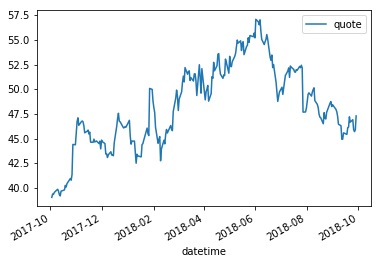

In [40]:
data = {
    'datetime': [datetime.datetime.fromtimestamp(t) for t in ts],
    'quote': q
}
pd.DataFrame(data).set_index('datetime').plot()

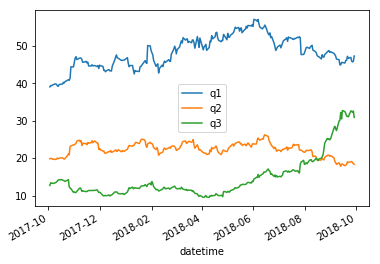

In [41]:
data = {
    'datetime': [datetime.datetime.fromtimestamp(t) for t in ts],
    'q1': r.json()['spark']['result'][0]['response'][0]['indicators']['quote'][0]['close'],
    'q2': r.json()['spark']['result'][1]['response'][0]['indicators']['quote'][0]['close'],
    'q3': r.json()['spark']['result'][2]['response'][0]['indicators']['quote'][0]['close']
}
pd.DataFrame(data).set_index('datetime').plot()